In [13]:
setwd('/import/DB/zhang//data')

In [14]:
sce = readRDS('OS.final.rds')

In [15]:
library(Seurat)

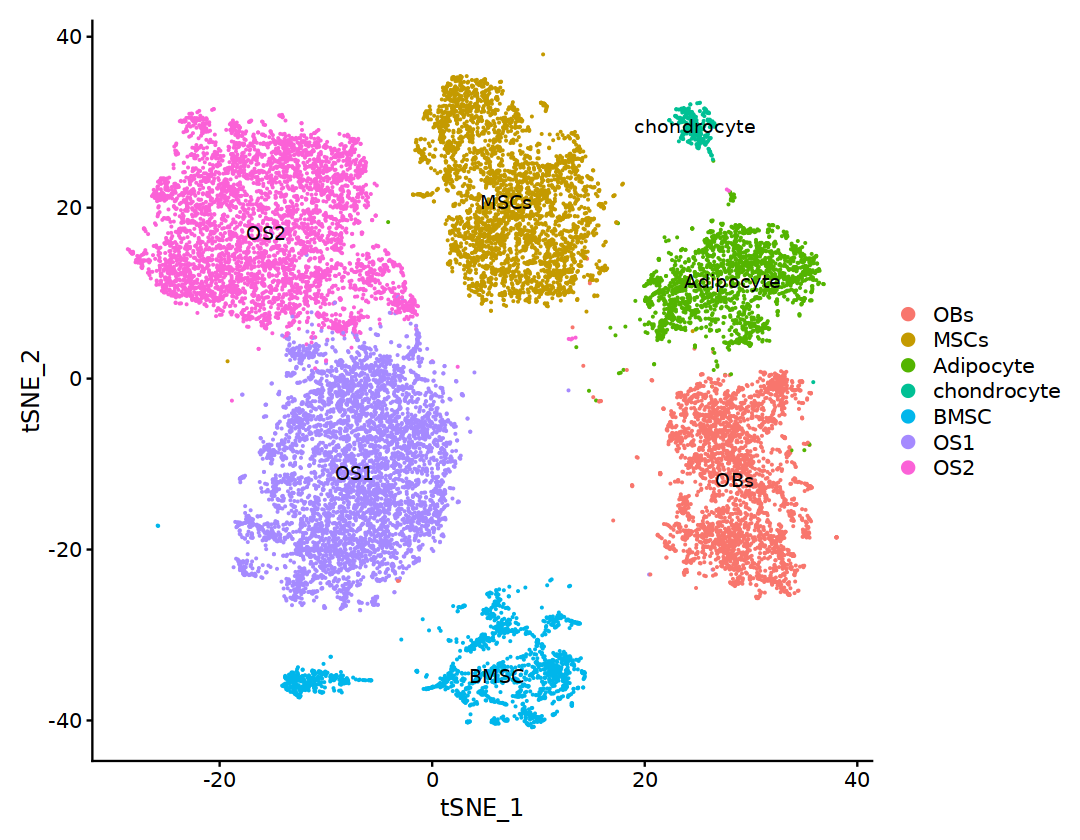

In [16]:
DimPlot(sce,reduction = 'tsne',label = T)

In [17]:
Idents(sce) = 'celltype'

In [18]:
library(CytoTRACE)

In [19]:
#  https://www.jianshu.com/p/0f1e5479e72f   cytotrace 完全颠倒的原因

In [20]:
marrow_10x_expr  = as.matrix(sce@assays$RNA@counts)
marrow_10x_pheno <- sce$celltype
marrow_10x_pheno = as.character(marrow_10x_pheno)
names(marrow_10x_pheno) <- rownames(sce@meta.data)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 3.3 GiB"


In [21]:

results = CytoTRACE(marrow_10x_expr, 
	ncores = 35, subsamplesize = 1000)
length(results)  # 8


The number of cells in your dataset exceeds 3,000. CytoTRACE will now be run in fast mode (see documentation). You can multi-thread this run using the 'ncores' flag. To disable fast mode, please indicate 'enableFast = FALSE'.

Warning message in CytoTRACE(marrow_10x_expr, ncores = 35, subsamplesize = 1000):
"5 genes have zero expression in the matrix and were filtered"
CytoTRACE will be run on 20 sub-sample(s) of approximately 977 cells each using 20 / 35 core(s)

Pre-processing data and generating similarity matrix...

Calculating gene counts signature...

Smoothing values with NNLS regression and diffusion...

Calculating genes associated with CytoTRACE...

Done



[1] 8

In [22]:
options(repr.plot.width = 9)

Running t-SNE. To use your own coordinates, use the 'emb' flag.



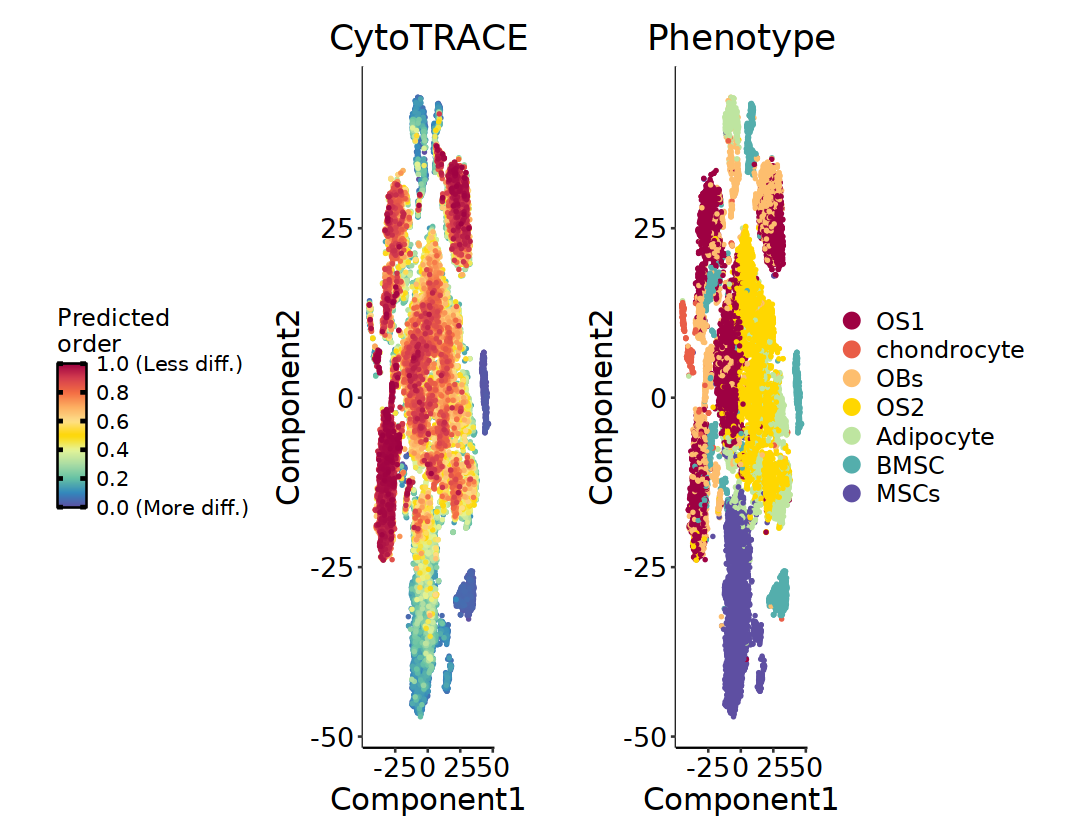

In [23]:
plotCytoTRACE(
	cyto_obj = results, 
	phenotype = marrow_10x_pheno, #细胞类型注释
	# gene = "Kit",  #是否映射特定基因表达
	emb = NULL,      #是否提供细胞降维坐标
	outputDir = "./" #图片储存路径
)